In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_covid = pd.read_csv("covid.csv", encoding='ISO-8859-1')
df_covid.head(1)


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [3]:
df_vaccinations = pd.read_csv("country_vaccinations.csv", encoding='ISO-8859-1')
df_vaccinations.head(1)

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/


In [4]:
#Read csv file and select date ,total_death and population columns 
df_covid = pd.read_csv("covid.csv", encoding='ISO-8859-1')
df_covid = df_covid[['date','total_deaths']]
df_covid = df_covid.dropna(subset=['total_deaths'])
df_covid['date'] = pd.to_datetime(df_covid['date'])
df_covid.head(10)

,date,total_deaths
84,2020-03-29,2.0
85,2020-03-30,2.0
86,2020-03-31,2.0
87,2020-04-01,2.0
88,2020-04-02,2.0
89,2020-04-03,2.0
90,2020-04-04,2.0
91,2020-04-05,5.0
92,2020-04-06,5.0
93,2020-04-07,5.0


In [5]:
# Obtain information  of total vaccinations from csv 
df_vaccinations = pd.read_csv("country_vaccinations.csv", encoding='ISO-8859-1')
df_vaccinations.head()
df_vaccinations = df_vaccinations[['date','total_vaccinations']]
df_vaccinations = df_vaccinations.dropna(subset=['total_vaccinations'])
df_vaccinations['date'] = pd.to_datetime(df_vaccinations['date'])
df_vaccinations.tail(10)

,date,total_vaccinations
86502,2022-03-20,8210637.0
86503,2022-03-21,8230061.0
86504,2022-03-22,8313471.0
86505,2022-03-23,8414477.0
86506,2022-03-24,8552429.0
86507,2022-03-25,8691642.0
86508,2022-03-26,8791728.0
86509,2022-03-27,8845039.0
86510,2022-03-28,8934360.0
86511,2022-03-29,9039729.0


In [6]:
# Merge the data on the 'country' column (assuming both datasets have a 'country' column)
# You may want to adjust the merge condition based on your data columns (e.g., 'date', 'country')
# df_merged = pd.merge(df_covid, df_vaccinations, on='date', how='inner')

# Create a scatter plot for deaths and vaccinations against population
# plt.figure(figsize=(10, 6))

# Scatter plot for total deaths vs. population
# plt.scatter(df_merged['total_deaths'], df_merged['population'], color='red', label='Deaths', alpha=0.6)

# Scatter plot for total vaccinations vs. population
# plt.scatter(df_merged['total_vaccinations'], df_merged['population'], color='blue', label='Vaccinations', alpha=0.6)

# Set labels and title
# plt.xlabel('Total Deaths / Total Vaccinations')
#plt.ylabel('Population')
#plt.title('Total Deaths and Total Vaccinations vs Population')

# Add a legend
#plt.legend()

# Display the plot
#plt.grid(True)
#plt.show()

              date  total_vaccinations  total_deaths
9650257 2022-03-29           9039729.0        3729.0
9650258 2022-03-29           9039729.0       28165.0
9650259 2022-03-29           9039729.0       97711.0
9650260 2022-03-29           9039729.0          36.0
9650261 2022-03-29           9039729.0        3596.0
9650262 2022-03-29           9039729.0      105297.0
9650263 2022-03-29           9039729.0        2302.0
9650264 2022-03-29           9039729.0      191138.0
9650265 2022-03-29           9039729.0      973682.0
9650266 2022-03-29           9039729.0         110.0
9650267 2022-03-29           9039729.0     2419904.0
9650268 2022-03-29           9039729.0        7149.0
9650269 2022-03-29           9039729.0        1016.0
9650270 2022-03-29           9039729.0        5674.0
9650271 2022-03-29           9039729.0       42306.0
9650272 2022-03-29           9039729.0           7.0
9650273 2022-03-29           9039729.0     6172540.0
9650274 2022-03-29           9039729.0        

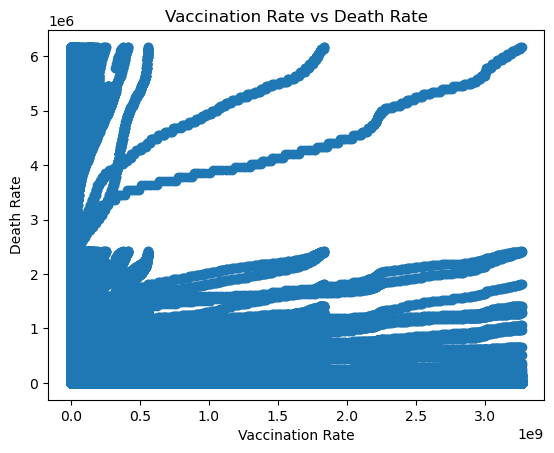

In [12]:
# Merge the two DataFrames on the 'date' column
merged_df = pd.merge(df_vaccinations, df_covid, on='date', how='inner')
print(merged_df.tail(20))

# Check relevant columns (e.g., "vaccination_rate", "death_rate")
correlation = merged_df[['total_vaccinations', 'total_deaths']].corr()
print(correlation)

# Visualize the correlation with a scatter plot
plt.scatter(merged_df['total_vaccinations'], merged_df['total_deaths'])
plt.xlabel('Vaccination Rate')
plt.ylabel('Death Rate')
plt.title('Vaccination Rate vs Death Rate')
plt.show()


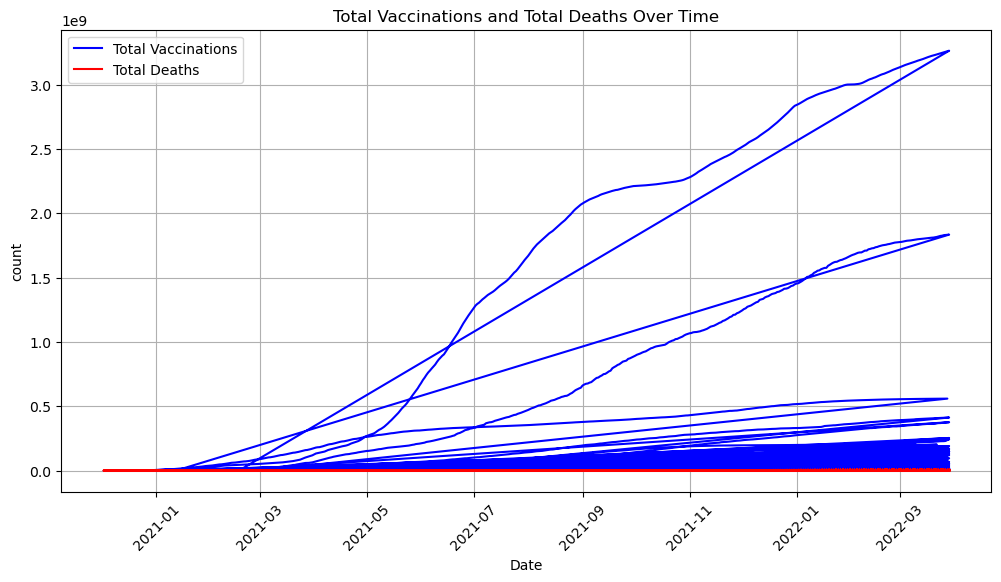

In [8]:
# Did the vaccine actually help prevent deaths?
# Find the relation between mortality and vaccination in time 
# Plot Total Vaccinations
import matplotlib.pyplot as plt

# Plotting the merged data
plt.figure(figsize=(12, 6))
plt.plot(merged_df['date'], merged_df['total_vaccinations'], label='Total Vaccinations', color='blue')

# Plot Total Deaths
plt.plot(merged_df['date'], merged_df['total_deaths'], label='Total Deaths', color='red')

plt.title('Total Vaccinations and Total Deaths Over Time')
plt.xlabel('Date')
plt.ylabel('count')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

/var/folders/qx/wdt486c517n4vrrtq8dnsww40000gn/T/ipykernel_24033/2582105578.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  resampled_df = merged_df.resample('6M').sum()


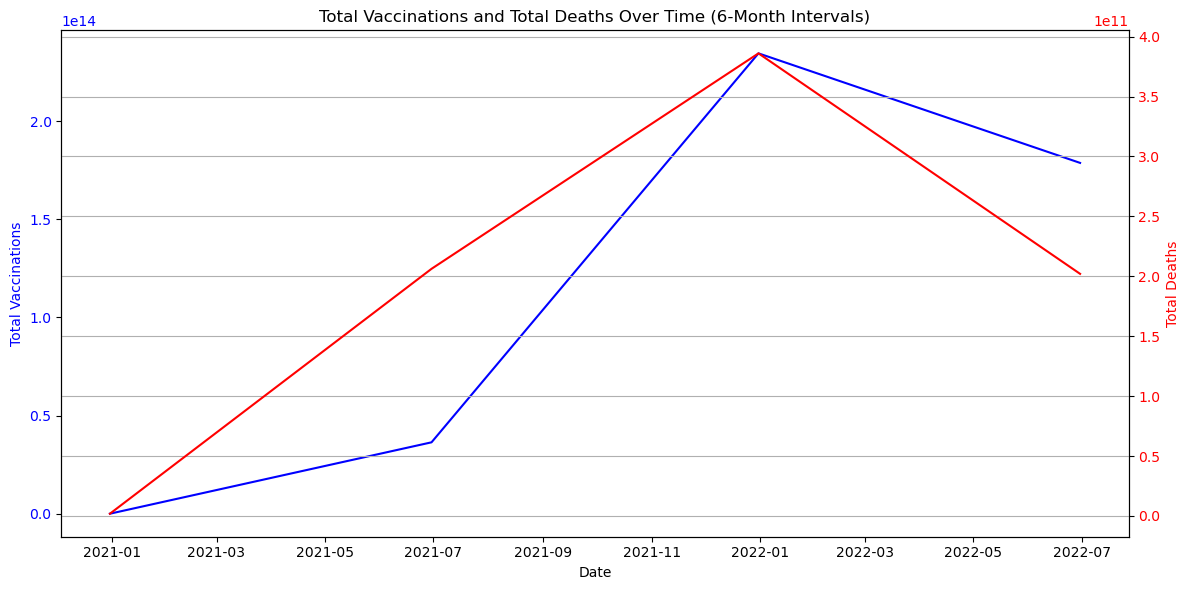

In [9]:
#Observing the relation between death and vaccinations with specific plots
# Assuming merged_df has already been created after merging df_vaccinations and df_covid
merged_df.set_index('date', inplace=True)

# Resample the data every 6 months, aggregating using sum for 'total_vaccinations' and 'total_deaths'
resampled_df = merged_df.resample('6M').sum()

# Plotting the resampled data with two y-axes
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Total Vaccinations on primary y-axis (left)
ax1.plot(resampled_df.index, resampled_df['total_vaccinations'], label='Total Vaccinations', color='blue')
ax1.set_xlabel('Date')
ax1.set_ylabel('Total Vaccinations', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a secondary y-axis for Total Deaths (right)
ax2 = ax1.twinx()
ax2.plot(resampled_df.index, resampled_df['total_deaths'], label='Total Deaths', color='red')
ax2.set_ylabel('Total Deaths', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Title and grid
plt.title('Total Vaccinations and Total Deaths Over Time (6-Month Intervals)')
plt.xticks(rotation=45)
fig.tight_layout()  # Adjust layout to prevent overlap
plt.grid(True)

# Show the plot
plt.show()